In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('jupiter_intern.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   25000 non-null  int64  
 1   age                           25000 non-null  int64  
 2   gender                        25000 non-null  object 
 3   location                      25000 non-null  object 
 4   monthly_income                25000 non-null  int64  
 5   monthly_emi_outflow           25000 non-null  int64  
 6   current_outstanding           25000 non-null  int64  
 7   credit_utilization_ratio      25000 non-null  float64
 8   num_open_loans                25000 non-null  int64  
 9   repayment_history_score       25000 non-null  int64  
 10  dpd_last_3_months             25000 non-null  int64  
 11  num_hard_inquiries_last_6m    25000 non-null  int64  
 12  recent_credit_card_usage      25000 non-null  int64  
 13  r

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def determine_credit_score_movement(row):
    emi_income_ratio = row['monthly_emi_outflow'] / row['monthly_income']
    if row['dpd_last_3_months'] > 60 and row['credit_utilization_ratio'] > 0.8 and row['num_hard_inquiries_last_6m'] > 3:
        return 'decrease'
    elif emi_income_ratio < 0.3 and row['repayment_history_score'] > 80:
        return 'increase'
    else:
        return 'stable'

In [5]:
data['target_credit_score_movement'] = data.apply(determine_credit_score_movement, axis=1)

In [6]:
features = data.drop(columns=['customer_id', 'target_credit_score_movement'])
features = pd.get_dummies(features)  # One-hot encode categorical variables
labels = data['target_credit_score_movement']

In [7]:
features.fillna(-1, inplace=True)

In [8]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
y_pred

array([2, 2, 1, ..., 2, 2, 2])

In [13]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
report_df

,precision,recall,f1-score,support
decrease,1.000000,0.950000,0.974359,20.0000
increase,0.879271,0.957816,0.916865,403.0000
stable,0.996037,0.988420,0.992214,4577.0000
accuracy,0.985800,0.985800,0.985800,0.9858
macro avg,0.958436,0.965412,0.961146,5000.0000
weighted avg,0.986642,0.985800,0.986069,5000.0000


In [15]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1,2])


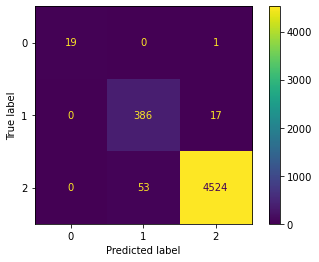

In [16]:
cm_display.plot()
plt.show()

In [17]:
conf_matrix 


array([[  19,    0,    1],
       [   0,  386,   17],
       [   0,   53, 4524]], dtype=int64)